#### TRAVEL AGGREGATOR ANALYSIS
##### Certification Project

In [635]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [636]:
df_Booking = pd.read_csv('D:\\workflow\\dt_learn_data_science\\edureka\\datasets\\Bookings.csv')
df_Session = pd.read_csv('D:\\workflow\\dt_learn_data_science\\edureka\\datasets\\Sessions.csv')

In [637]:
df_Booking.head(2)

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5


In [638]:
df_Session.head(2)

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN


In [639]:
dfAll = pd.merge(df_Booking, df_Session, how='left', on="booking_id")
# dfAll = df_Booking

In [640]:
dfAll.head(2)

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z


1. Find the number of distinct bookings, sessions, and searches from the given datasets.

In [641]:
print(f"Bookings: {dfAll.booking_id.nunique()}")
print(f"Sessions: {dfAll.session_id.nunique()}")

Bookings: 339
Sessions: 329


2. How many sessions have more than one booking

In [642]:
print(f"Sessions More: {dfAll.booking_id.nunique() - dfAll.session_id.nunique() }")

Sessions More: 10


3. Which days of the week have the highest number of bookings? Also, draw a pie chart to
show the distribution for all days of the week

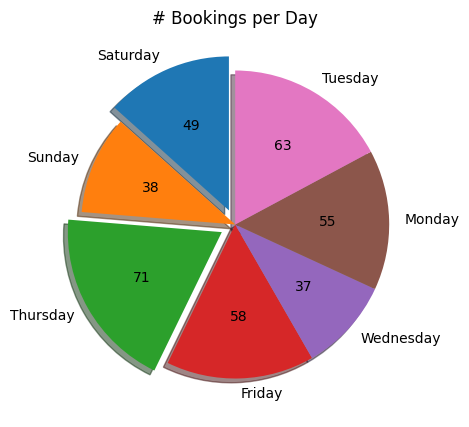

In [643]:
dfAll['booking_time'] = pd.to_datetime(dfAll['booking_time'])
dfAll['day']          = dfAll['booking_time'].dt.day_name()
dfAll['month']        = dfAll['booking_time'].dt.month_name()
dfAll['Yearquarter']  = dfAll['booking_time'].dt.to_period('Q')
dfAll['quarter']      = dfAll['booking_time'].dt.quarter
dfAll['date']         = dfAll['booking_time'].dt.date
dfAll['Yearquarter']  = dfAll['Yearquarter'].apply(lambda a: str(a).replace('Q',''))


df2 = dfAll[['day']]
to_dict = dict()
explode = [0.1, 0, 0.1, 0, 0, 0,  0]
plt.figure(figsize=(5, 5))
for Day in set(df2['day']):
    to_dict[Day] = df2[df2.day == Day].day.count()
plt.pie(to_dict.values(), labels=to_dict.keys(),startangle=90,explode=explode, shadow=True,
        autopct=lambda p: f'{(p*sum(to_dict.values())/100)+0.5 :.0f}')
plt.title('# Bookings per Day')

plt.show()

In [644]:
dfAll

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,...,distance_km,session_id,search_id,search_time,session_starting_time,day,month,Yearquarter,quarter,date
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08+00:00,Desktop,2565.28,MMT,...,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z,Wednesday,February,20201,1,2020-02-05
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47+00:00,Android,23120.00,YATRA,...,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z,Wednesday,November,20184,4,2018-11-21
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58+00:00,Android,25717.60,YATRA,...,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z,Monday,December,20194,4,2019-12-16
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38+00:00,Desktop,135969.60,GOIBIBO,...,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z,Friday,October,20214,4,2021-10-29
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10+00:00,Android,31791.20,GOIBIBO,...,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z,Tuesday,August,20203,3,2020-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21 06:40:56+00:00,Android,6552.00,GOIBIBO,...,1274.7,session_251,search_978,2020-03-21T06:38:49.374Z,2020-03-21T06:39:51.268Z,Saturday,March,20201,1,2020-03-21
363,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31 20:35:35+00:00,Desktop,126502.46,GOIBIBO,...,7190.9,session_78,search_375,2020-01-31T20:27:38.420Z,2020-01-31T19:48:13.166Z,Friday,January,20201,1,2020-01-31
364,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11 14:31:28+00:00,Desktop,55152.80,YATRA,...,6760.0,session_118,search_30,2018-10-11T14:05:20.610Z,2018-10-11T12:38:29.186Z,Thursday,October,20184,4,2018-10-11
365,customer_241,booking_336,Gurgaon,India,Amsterdam,Netherlands,2022-07-11 18:46:59+00:00,Desktop,41117.60,GOIBIBO,...,6354.9,session_51,search_890,2022-07-11T18:42:18Z,2022-07-11T18:24:53.318Z,Monday,July,20223,3,2022-07-11


4. For each of the service names, display the total number of bookings and the total Gross
Booking Value in INR

In [645]:
df2 = dfAll.groupby(['service_name']).agg({'booking_id': ['count'], 'INR_Amount': ['sum']})
df2.columns = ['count','sum']
df2 = df2.reset_index()
df2

,service_name,count,sum
0,GOIBIBO,202,6535751.17
1,MMT,53,688445.65
2,YATRA,112,3742584.21


5. For customers who have more than 1 booking, which is the most booked route
(from_city to to_city)?

In [646]:
mostBookedRoute = dfAll.loc[dfAll['booking_id'].map(dfAll['booking_id'].value_counts()) > 1]
# mostBookedRoute
# mostBookedRoute.groupby(['from_city','to_city']).count().sort_values(by=['from_city','to_city'], axis = 0).iloc[0]
mostBookedRoute.groupby(['from_city']).size().idxmax()

'Gurgaon'

6. Which are the top 3 departure cities from where customers book mostly in advance, if
there have been at least 5 departures from that city?

In [647]:
mostBookedAdvance = dfAll.loc[dfAll['days_to_departure'] >= 5 ]
mostBookedAdvance['from_city'].value_counts().head(3)

Gurgaon    101
Mumbai      25
Delhi       23
Name: from_city, dtype: int64

7. Plot a heatmap displaying correlations of the numerical column and report which pair
of numerical columns in the bookings dataset, have the maximum correlation?


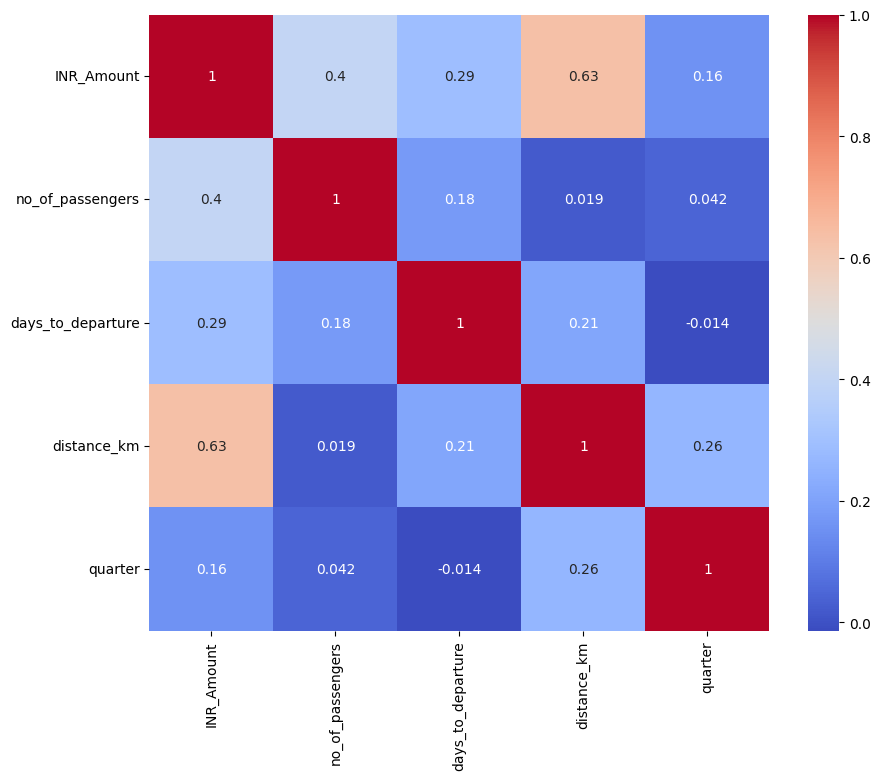

In [648]:
corr = dfAll.corr(numeric_only=True, method='pearson')
_, ax = plt.subplots(figsize=(10, 8))
_ = sns.heatmap(corr,ax=ax, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="coolwarm")

8. For each service, which is the most used device type for making bookings on the
platform?


In [649]:
df1         = dfAll.groupby(['service_name','device_type_used']).agg({'device_type_used': ['count']})
df1.columns = ['count']
df1         = df1.reset_index()
df1.loc[df1.groupby('service_name')['count'].transform('max').eq(df1['count'])]

,service_name,device_type_used,count
2,GOIBIBO,IOS,73
5,MMT,Desktop,34
9,YATRA,Desktop,58


9. Plot the trends at a quarterly frequency for the number of bookings by each of the
device types, that is, plot a time series for each year and quarter showing the number
of bookings performed by each device type

In [650]:
df3         = dfAll.groupby(['device_type_used','date','Yearquarter']).agg({'device_type_used': ['count']})
df3.columns = ['count']
df3         = df3.reset_index()
df3.set_axis(["device_type_used", "date", 'Yearquarter', "frequency"], axis="columns", inplace=True)
df3 = df3.groupby(['device_type_used','Yearquarter'])['frequency'].sum().reset_index()


In [652]:
df3.device_type_used.unique()

array(['Android', 'Desktop', 'IOS', 'MobileWeb', 'Tablet'], dtype=object)

Plot For Android

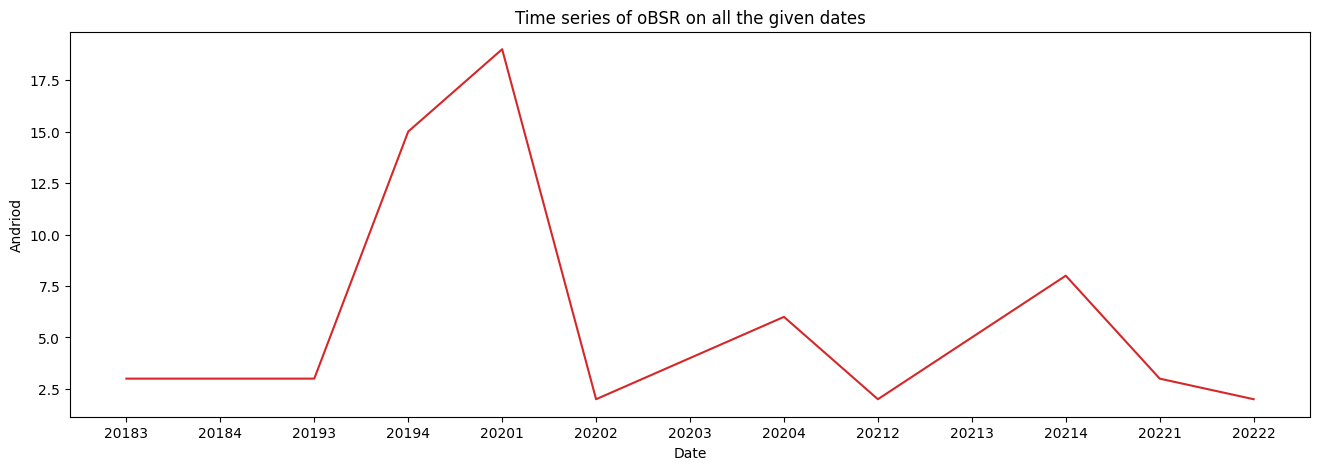

In [661]:
df_Andriod = df3[df3["device_type_used"]=="Android"]
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Andriod', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df_Andriod, x=df_Andriod.Yearquarter, y=df_Andriod.frequency, title='Andriod Devices')
plt.show()     

Plor For Desktop

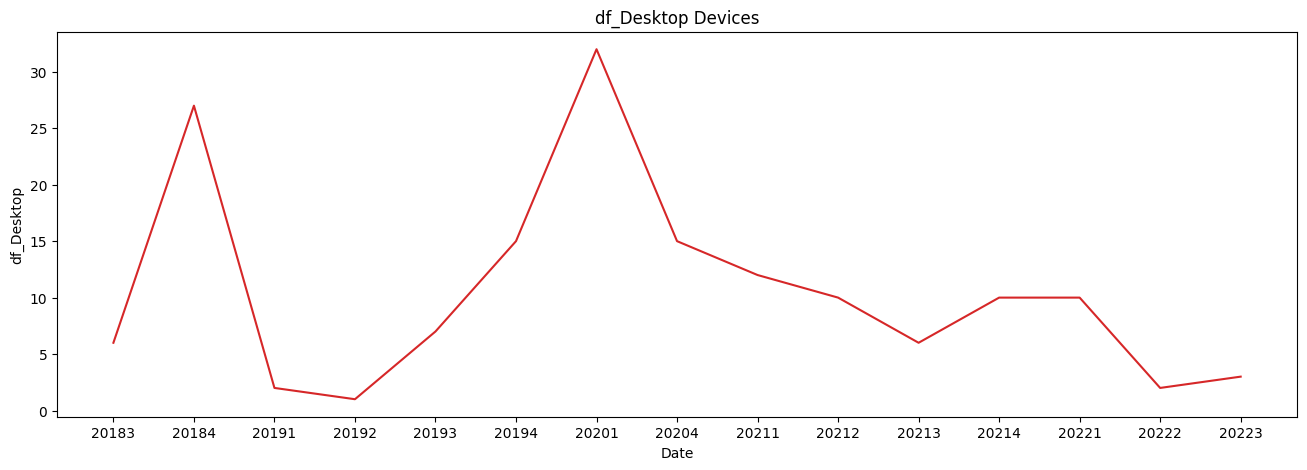

In [662]:
df_Desktop = df3[df3["device_type_used"]=="Desktop"]
def plot_df(df, x, y, title="", xlabel='Date', ylabel='df_Desktop', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df_Desktop, x=df_Desktop.Yearquarter, y=df_Desktop.frequency, title='df_Desktop Devices')
plt.show()   

Plor For IOS

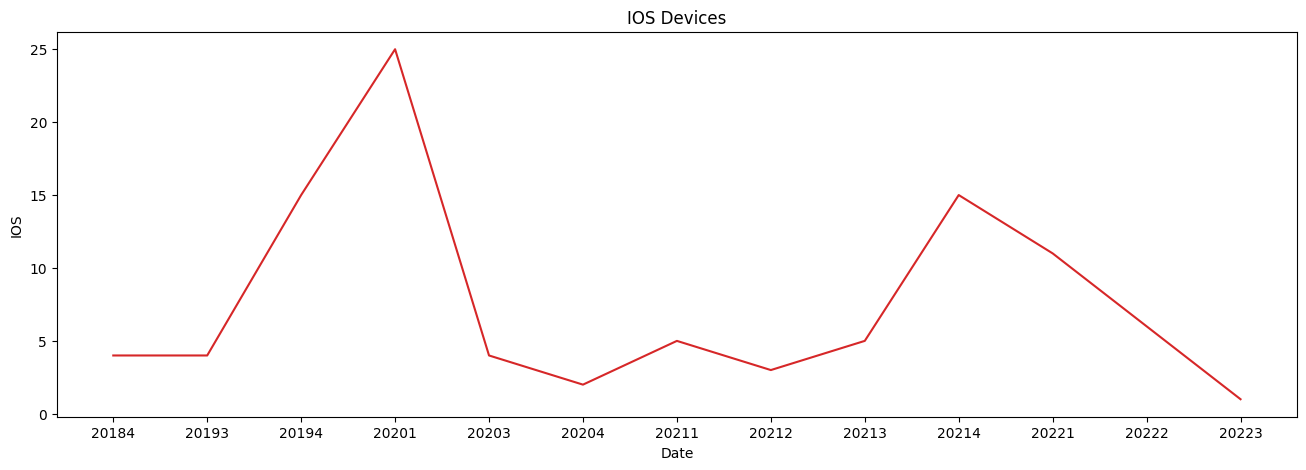

In [663]:
df_IOS = df3[df3["device_type_used"]=="IOS"]
def plot_df(df, x, y, title="", xlabel='Date', ylabel='IOS', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df_IOS, x=df_IOS.Yearquarter, y=df_IOS.frequency, title='IOS Devices')
plt.show()   

Plor For Tablet

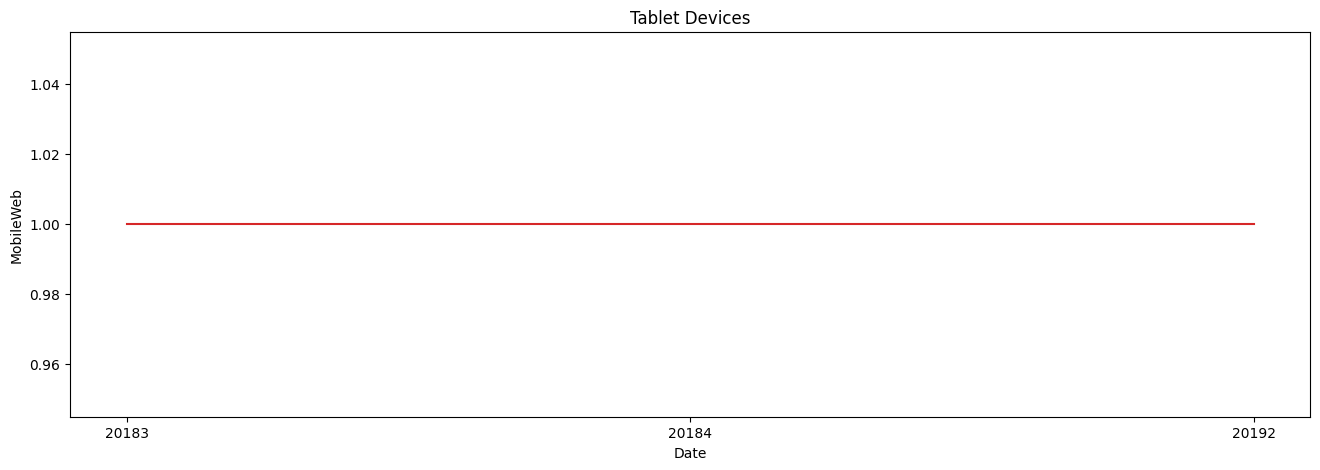

In [665]:
df_Tablet = df3[df3["device_type_used"]=="Tablet"]
def plot_df(df, x, y, title="", xlabel='Date', ylabel='MobileWeb', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df_Tablet, x=df_Tablet.Yearquarter, y=df_Tablet.frequency, title='Tablet Devices')
plt.show()   

Plor For MobileWeb

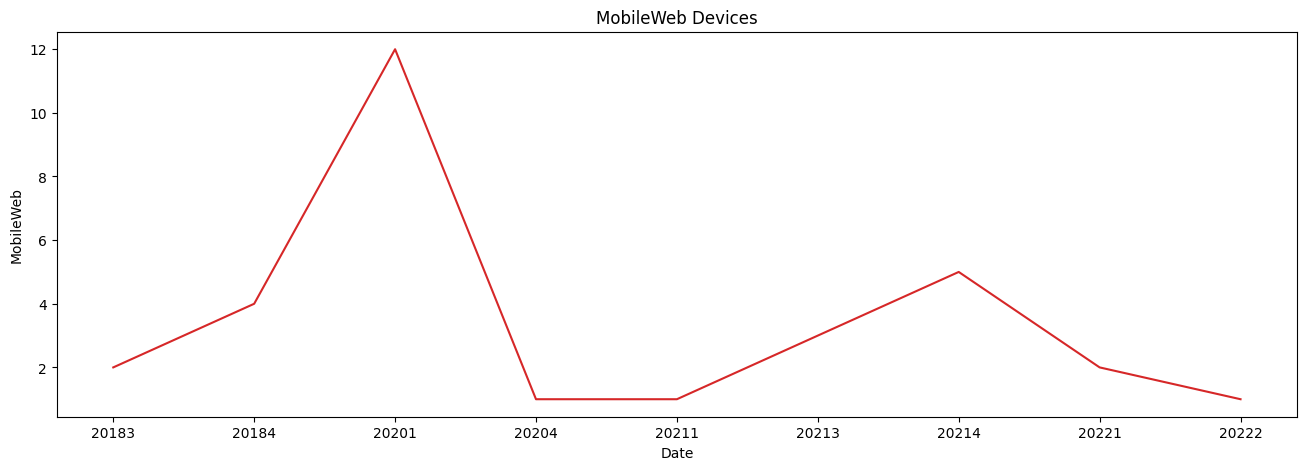

In [666]:
df_MobileWeb = df3[df3["device_type_used"]=="MobileWeb"]
def plot_df(df, x, y, title="", xlabel='Date', ylabel='MobileWeb', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df_MobileWeb, x=df_MobileWeb.Yearquarter, y=df_MobileWeb.frequency, title='MobileWeb Devices')
plt.show()   

10.Consider the following example: 

In [655]:
# Consider the following example: 12 customers performed a total of 100 searches but
# only a few of them performed 10 bookings in total.
# searches=100 bookings=10 customers=12
# The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above
# information/context, answer the following:

df4                = df_Session[["search_id", "search_time", "booking_id"]]
df4['search_time'] = pd.to_datetime(df4['search_time'])
df4['day']         = df4['search_time'].dt.day_name()
df4['month']       = df4['search_time'].dt.month_name()
df4['date']        = df4['search_time'].dt.date
df4                = df4[["search_id", "booking_id", "month", "day", "date"]]

In [656]:
# • What is the average oBSR for each month of the year?
df5         = df4.groupby(['month']).agg({'search_id': ['count'],'booking_id': ['count']})
df5.columns = ['count','count']
df5         = df5.reset_index()
df5.set_axis(["month", "#_searchs", "#_bookings"], axis="columns", inplace=True)
df5['%_average_month'] = 100 * df5['#_bookings'] / df5['#_searchs']
df5

,month,#_searchs,#_bookings,%_average_month
0,April,40,11,27.500000
1,August,30,9,30.000000
2,December,199,50,25.125628
3,February,177,52,29.378531
4,January,211,55,26.066351
5,July,80,13,16.250000
6,June,33,13,39.393939
7,March,105,27,25.714286
8,May,33,6,18.181818
9,November,181,41,22.651934


In [657]:
# • What is the average oBSR for each day of the week?
# • What is the average oBSR for each month of the year?
df6         = df4.groupby(['day']).agg({'search_id': ['count'],'booking_id': ['count']})
df6.columns = ['count','count']
df6         = df6.reset_index()
df6.set_axis(["day", "#_searchs", "#_bookings"], axis="columns", inplace=True)
df6['%_average_day'] = 100 * df6['#_bookings'] / df6['#_searchs']
df6

,day,#_searchs,#_bookings,%_average_day
0,Friday,203,57,28.078818
1,Monday,254,54,21.259843
2,Saturday,200,49,24.500000
3,Sunday,113,38,33.628319
4,Thursday,292,70,23.972603
5,Tuesday,218,62,28.440367
6,Wednesday,217,36,16.589862


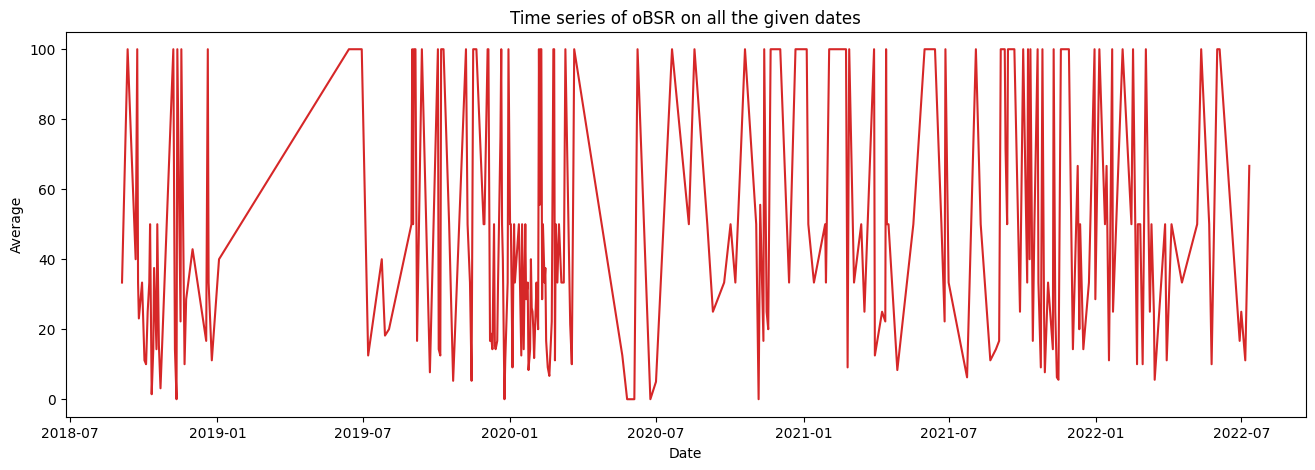

In [658]:
# • Plot a time series of oBSR on all the given dates
df7         = df4.groupby(['date']).agg({'search_id': ['count'],'booking_id': ['count']})
df7.columns = ['count','count']
df7         = df7.reset_index()
df7.set_axis(["date", "#_searchs", "#_bookings"], axis="columns", inplace=True)
df7['average_date'] = 100 * df7['#_bookings'] / df7['#_searchs']
df7

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Average', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df7, x=df7.date, y=df7.average_date, title='Time series of oBSR on all the given dates') 

Data Description: Please provide answers to the following questions:

In [659]:
# 1. Find the number of distinct bookings, sessions, and searches from the given datasets.
        # - Bookings: 339
        # - Sessions: 329
# 2. How many sessions have more than one booking
        # - Sessions More: 10
# 3. Which days of the week have the highest number of bookings? Also, draw a pie chart to
# show the distribution for all days of the week
        # - Thurdays: 71
# 4. For each of the service names, display the total number of bookings and the total Gross
# Booking Value in INR
        # service_name	count	sum
	#  GOIBIBO	202	6535751.17
	#  MMT	        53	688445.65
	#  YATRA	112	3742584.2
# 5. For customers who have more than 1 booking, which is the most booked route
# (from_city to to_city)?
        # - Gurgaon
# 6. Which are the top 3 departure cities from where customers book mostly in advance, if
# there have been at least 5 departures from that city?
        # Gurgaon    101
        # Mumbai      25
        # Delhi       23
# 7. Plot a heatmap displaying correlations of the numerical column and report which pair
# of numerical columns in the bookings dataset, have the maximum correlation?
        # distance_km - 0.632731
# 8. For each service, which is the most used device type for making bookings on the
# platform?
        # service_name	device_type_used	count
	# GOIBIBO	IOS	                73
	# MMT	        Desktop	                34
	# YATRA	        Desktop	                58
# 9. Plot the trends at a quarterly frequency for the number of bookings by each of the
# device types, that is, plot a time series for each year and quarter showing the number
# of bookings performed by each device type
        # Done. See the figure in te point 9

In [660]:
corr = dfAll.corr(numeric_only=True, method='pearson')
corr

,INR_Amount,no_of_passengers,days_to_departure,distance_km,quarter
INR_Amount,1.000000,0.401168,0.288323,0.632731,0.156322
no_of_passengers,0.401168,1.000000,0.177522,0.019185,0.042344
days_to_departure,0.288323,0.177522,1.000000,0.208722,-0.013654
distance_km,0.632731,0.019185,0.208722,1.000000,0.260593
quarter,0.156322,0.042344,-0.013654,0.260593,1.000000
